<a href="https://colab.research.google.com/github/Prem-2407/HotelBooking-AlmaBetter/blob/main/HotelBooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                          Project Name  :  Hotel Booking Analysis
---







Project Type :Exploratory Data Analysis

Contirbution:Team 

Team Member 1 : G . Premanandh

Team Member 2 : Ch .Praveen kumar 

# **Project Summary**

In this project, I recieved one csv file as an input that is Hotel Booking Analysis csv . I choose this project because nowadays , people travel a lot .So for travelling , hotel booking is thier first priority as it is the most important part of travelling and its needs to be done  before hand with all the details. While bookimng the hotel , generally people search for availabilty,sanity,comparing prices with other hotels , hotel location ,vehicle parking places , hotel reviews ,payment policies , and their food menu .we  had little idea about what to do with the csv file .

Later with the help of some class videos and study materials ,and with the reference of the study materials, we started using it in this project for anlaysing smaller things form the csv file , like mounting  the drive ,finding the head and tail of the file ,which by default gives the first five rows of the csv file .Then we search columns ,which showed 32 different columns in the csv file .Later we analysed the unique charecters present in it .Then  started analsying for bigger datasets ,like cleaing the data by removing duplicate rows from the file ,handling the missing values in the  dataset ,converting the columns to their appropriate data set, and adding some important columns .

 Some of our key findings were : among two diiferent hotels ,the city hotel receives number of bookings with the higher revenue than a resort hotel, but it also faced  a lot of cancellations  . Among the distribution channels the TA/TO channel does a higher number of hotel bookings than other channels .The TA/TO  channel also faced the highestnumber of hotel booking cancellations . The highest number of guest arrivals in which month of the year and the reason behind the hotel booking cancellation . 


#  Problem Statement

**Problem** **Statement**

---



**Have you ever wondered when the best time of the year to book a hotel room is? Or the optimal length in order to get the best daily rate ? What if you wanted to predict whether or not a hotel was likely to recieve a disproportiontely high number of special requests ? This hotel booking datsetcan help you explore thise questions!**

**This data set contains booking innformaton for a city hotel and a resort hotel ,and includes infirmatin such as when the booking happened ,length of the stay, the number of adults,children,and/or babies, and the number of avaiilble parking spaces ,among other things .All personally identifying information has been removes from the data .**

Explore and analyze the data to discover important factors that govern the bookings. 

#  *Let's Begin* !

Data collection & Importing Libraries 

In [ ]:
# invite friends to kaggle party
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

Loading Data set 

In [ ]:
# attach files to the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loadinng the file 
hotel_df = pd.read_csv('/content/drive/MyDrive/hotel booking/hotel.csv')

In [ ]:
#checking the file type 
type(hotel_df)

pandas.core.frame.DataFrame

whenever we try to visit the hotel or before looking it ,,we need to check for the availabilty ,accomodations ,compare prices ,hotel location,vehicle parking places ,hotel reviews ,payment polices ,additional taxes and fees ,and additional amenitis

 lets check for these things before booking the hotel .

DataSet First View 

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


By this we can  observe that this datset contains 5 rowsand 32 columns among whichis_cancelled ,stays_in_weekend_nights,stays_in_week_nights,days_in_waiting_list,required_car_parking_spaces,and total_of_special_requests have null values .These null values indicates about no availbility of the things at that particular time .

In [ ]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


Dataset Implementation & Description

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The above result shows that how many null counts that are present in the 32 columns and 119390 rows .It also shows different like integer ,float and object.

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Its showing the names of the 32 columns

In [ ]:
#different types of hotels availble
hotel_df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Mostly the customers  used the city hotels 79330 compared to the resort hotel booking 40060 took place .

In [ ]:
#cancelled hotels
hotel_df.is_canceled.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64>

In [ ]:
hotel_df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

This shows that in 2016 there was maximum number of customers arrived in hotel

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


This  result shows that out of 32 columns children ,company ,agent and country have null values .

checking for all the unique values attained by each column whose meanings are difficult to understand 

Check Unique Values

In [ ]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel_df['is_canceled'].unique()

array([0, 1])

In [ ]:
hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

#  Cleaning the data 
 Cleaning the data is the crucial step beforre performing the EDA as it removes the unwanted datait will perform diferent steps :- 1. Removinng the duplicates rows , 2. Hamdling the missing values in dataset , 3.converting columns to appropriate dataset , 4 . adding important columns 

# 1) Removing duplicates rows 

In [ ]:
# showing the number of duplicate rows
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

In [ ]:
#checking duplicate values
hotel_df.drop_duplicates(inplace = True)

In [ ]:
hotel_df.shape

(87396, 32)

#  2) Handling the missing values in dataset

In [ ]:
# columns containing missing values.
hotel_df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

comopoany and agent columns contaiins their respective numbers. There may be chances of customer not booking  the hotel via company or some agent ,so in that case values can be null under these situations.The null values will be by 0 inn these columns

In [ ]:
hotel_df[['company','agent']] = hotel_df[['company','agent']].fillna(0)

In [ ]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

The children column shown 0 as a value which means there were there no children present in group of customers who made the transcation .It also  shown that nan values are the missing values due to error in recording the data .So i will be replacing the null values with mean value of children

In [ ]:
hotel_df['children'].fillna(hotel_df['children'].mean(),inplace = True )

Next column which has null value is 'country'. This column indicates the country from where customers belong .As this column is a string type of dataset the missing values can be replaced with the mode of this column .

In [ ]:
hotel_df['country'].fillna('others',inplace = True )

In [ ]:
# Checking if all null values are removed 
hotel_df.isnull().sum().sort_values(ascending = False )[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [ ]:
hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] ==0].shape

(166, 32)

In [ ]:
hotel_df.drop(hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children']== 0 ].index,inplace= True)

3.Converting columns to appropriate dataset

In [ ]:
# converting datatype of colukns 'chulldren', 'company' and 'agent' from float to int .
hotel_df[['children','company','agent']] = hotel_df[['children','company','agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to date_type.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%d-%m-%Y')

4.Adding important columns

In [ ]:
#adding total staying days in hotels
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']

In [ ]:
#adding total peoplle num as column, i.e. total people num = num of adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']

By adding the column we can analyse the length of the customers

# New Section EDA (Exploratory data analysis)

In [ ]:
num_hotel_df =hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

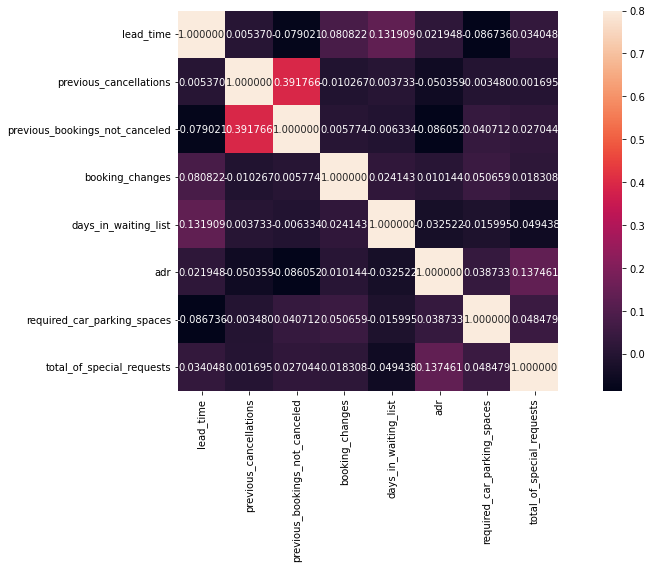

In [ ]:
#correlation matirx
corrmat =num_hotel_df.corr()
f, ax = plt.subplots(figsize=(16,7))
sns.heatmap(corrmat,annot = True , fmt='2f',annot_kws={'size':10} ,vmax=.8,square=True);

Total stay length and lead time have slighht correlaton .This means that longer the hotel stayspeople generally plans just before the Actual arrival of the hotel

Adr is slightly correlated with total people ,which shows that as more number of people means more revenue and therefore more Adr

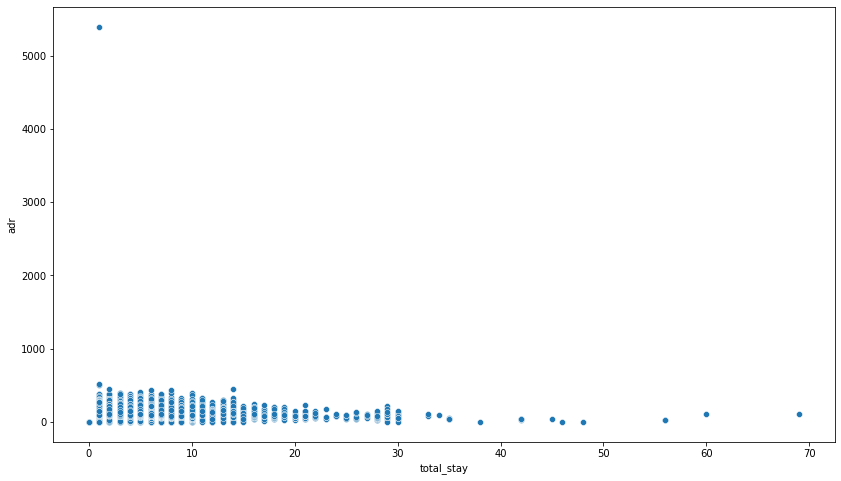

In [ ]:
plt.figure(figsize = (14,8))
sns.scatterplot(y = 'adr',x = 'total_stay',data= hotel_df)
plt.show()

There is an outlier which we will remove it for better scatter plot

In [ ]:
hotel_df.drop(hotel_df[hotel_df['adr']>5000].index,inplace = True)

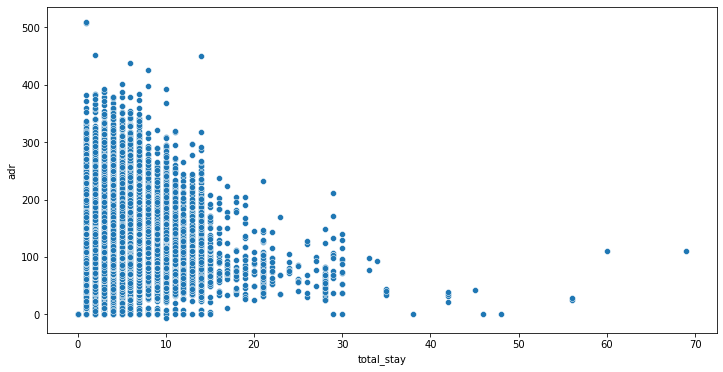

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y= 'adr',x = 'total_stay',data = hotel_df)
plt.show()

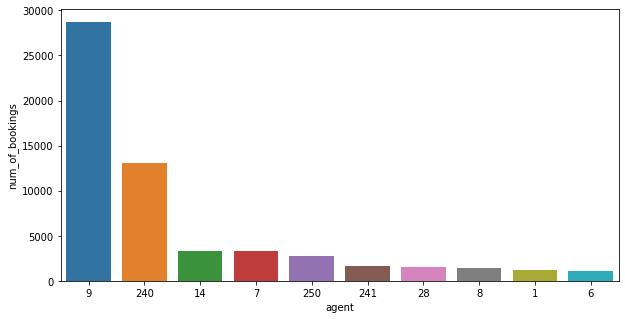

In [ ]:
d1 = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings',ascending = False)
d1.drop(d1[d1['agent'] ==0 ].index , inplace =True)
# 0 reprsents that booking is not made by an agent
# selecting top 10 performing agents 
d1 = d1[:10]
plt.figure(figsize = (10,5))
sns.barplot(x= 'agent',y = 'num_of_bookings',data = d1 , order = d1.sort_values('num_of_bookings',ascending = False).agent)
                                                                                  

The agent nine has made the highest number of bookings .



Most demanded room type and room type of highest generating adr

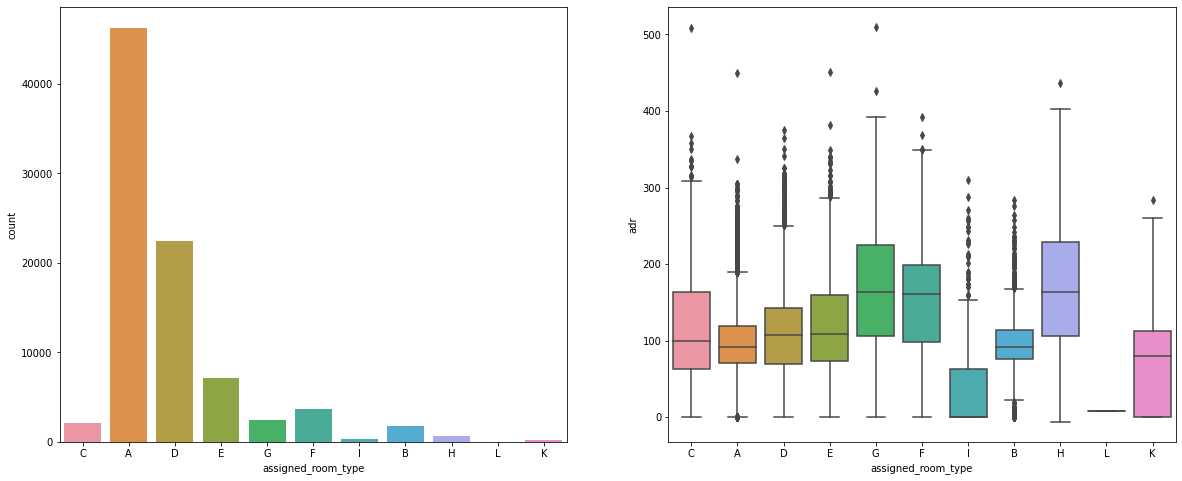

In [ ]:
fig , axes = plt.subplots(1,2 ,figsize=(20,8))

grp_by_room = hotel_df.groupby('assigned_room_type')
d1['num_of_bookings'] = grp_by_room.size()

sns.countplot(ax= axes[0],x = hotel_df['assigned_room_type'])
sns.boxplot(ax = axes [1],x =hotel_df['assigned_room_type'],y = hotel_df['adr'])
plt.show()

Most demanded room type is A but better adr rooms adre H, G, F  and C .Hotels should increase the number of room types A and H to maximize the revenue

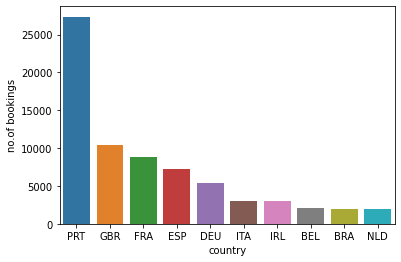

In [ ]:
grp_by_country = hotel_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no.of bookings'}).sort_values('no.of bookings',ascending = False)
d2 =d2[:10]
sns.barplot(x = d2.index,y = d2 ['no.of bookings'])
plt.show()

Most of the customers come from Portugal, Great Britan , France and Spain .

# 1) Distribution channel wise analysis

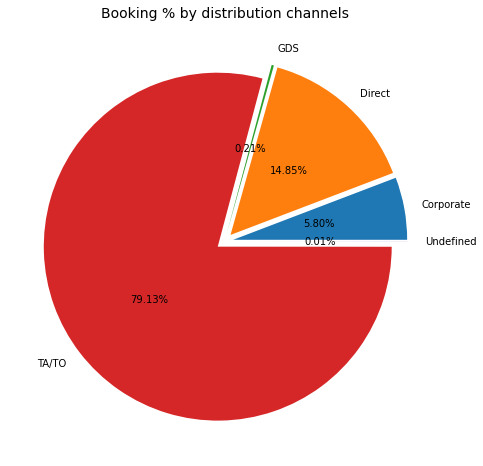

In [ ]:
# most common channel for booking hotel
group_by_dc = hotel_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/hotel_df.shape[0])*100,2)).reset_index().rename(columns ={0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data ,autopct="%.2f%%",explode=[0.05]*5,labels=labels,pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);


TA/TO is the most popular distribution channel for booking hotels .aruond 79.13% of the hotel bookings took place through this channel. the GDS channel consists of the fewest hotel bookings of around 0.21%

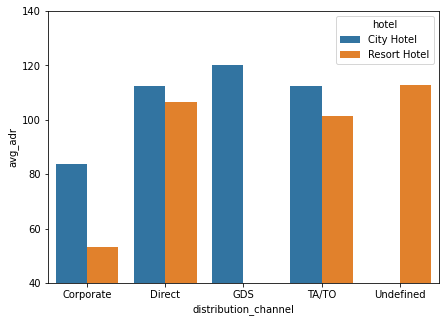

In [ ]:
#Distribution channel brining better revenue genarating deals for hotel
group_by_dc_hotel = hotel_df.groupby(['distribution_channel','hotel'])
d5 =pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr':'avg_adr'})
plt.figure(figsize =(7,5))
sns.barplot(x=d5['distribution_channel'],y =d5['avg_adr'],hue =d5['hotel'])
plt.ylim(40,140)
plt.show()


In contrast,the majority of the bookings are made through TA/TO. City Hotel can work to expand its reach on GDS channels in order to secure more high-value deals.Direct and TA/TO chann;es generate more revenue for the Resort Hotelneeds to increase outreach on the GDS channel to increase revenue . 

#  2) Hotel wise analysis

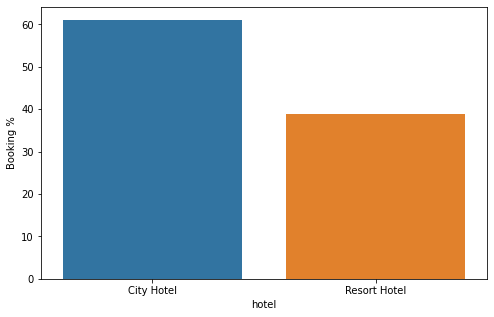

In [ ]:
grouped_by_hotel = hotel_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns ={0:'Booking %'})   # calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x =d1['hotel'], y = d1['Booking %'])
plt.show()

It shows that the city hotel bookings are around 60% andd almost 40% for the resort hotel.


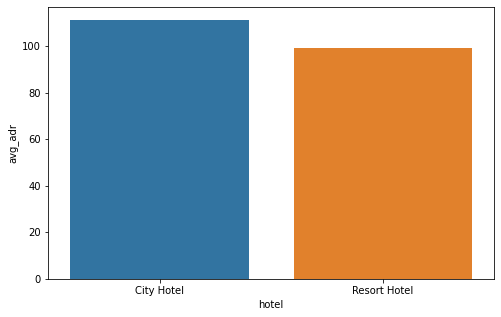

In [ ]:
# Which hotel is making more revenue ?
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns ={'adr':'avg_adr'})
plt.figure(figsize =(8,5))
sns.barplot(x = d3['hotel'],y = d3['avg_adr'])
plt.show()

When it comes to the revenue city hotels ara making more revenue more than the resort hotels

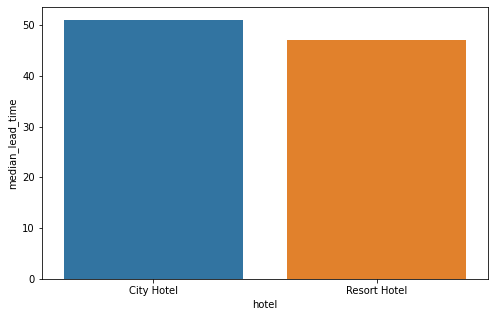

In [ ]:
# which hotel has higher lead time ?
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'}) 
plt.figure(figsize =(8,5))
sns.barplot(x= d3['hotel'], y =d2['median_lead_time'])
plt.show()

city hotel has the slightly higher median lead time .Also median lead time is significantly higher in each case , this hsows that customer generally  plans their hotel booking way too early . 

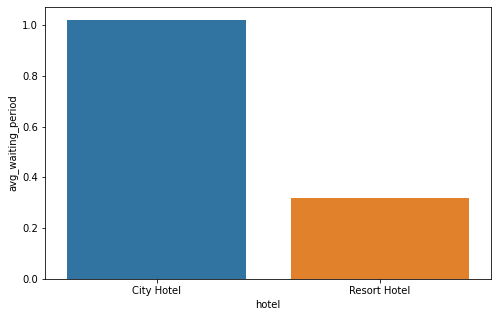

In [ ]:
# how long is waitiung time ?
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize =(8,5))
sns.barplot(x= d5['hotel'],y=d5['avg_waiting_period'])
plt.show()

As the wiaitng time is more in city hotel because of the more number of bookings happpening the city hotels compared to the resort hotels 

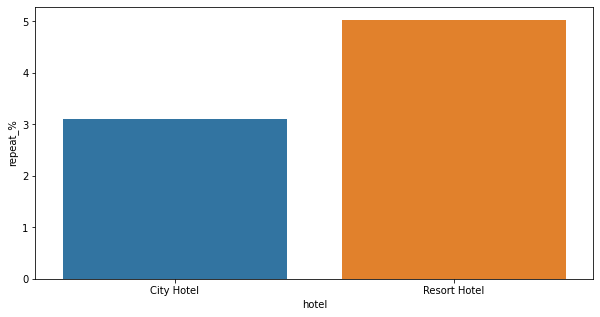

In [ ]:
# selecting and counting repeated customers bookings 
repeated_data = hotel_df[hotel_df['is_repeated_guest']==1]
repeat_grp =repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns ={0:'total_repeated_guests'})
 

#Calculating total bookings 
total_booking = grouped_by_hotel.size()
D2 =pd.DataFrame(total_booking).rename(columns = {0:'total_bookings'})
D3 =pd.concat([D1,D2],axis =1)

#calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x =D3.index,y = D3['repeat_%'])
plt.show()
  


Resort hotel has slightly higher chances of customers repeat % whne compard to the city hotel

#  3) Booking cancellation analysis

lets try to unnderstand what is the reason behind cancelling of the hotel bookings .

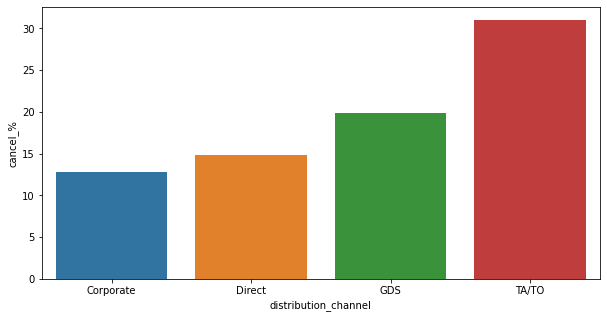

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index ='Undefined').rename(columns ={0: 'cancel_%'})
plt.figure(figsize =(10,5))
sns.barplot(x = d1.index, y =d1['cancel_%'])
plt.show()

TA/TO has the highest booking cancellation rate . Therefore , a booking via TA/TO is 30% more likely to get cancelled ,or more chances .

Let us see what causes the cancellation of booking of rooms customers . one question thet may arise is whether the longer waiting period or longer lead time causes the cancellation of hotel bookings

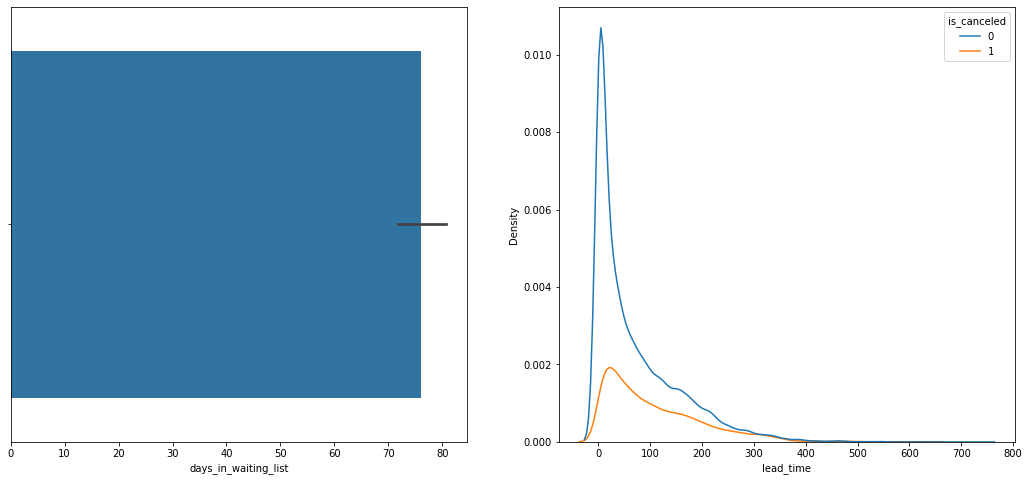

In [ ]:
waiting_bookings = hotel_df[hotel_df['days_in_waiting_list']  != 0] # selecting bookings with non zero waiting time 
fig,axes = plt.subplots(1,2, figsize=(18,8))
sns.barplot(ax=axes[0],x = 'days_in_waiting_list' , hue ='is_canceled', data=waiting_bookings)
sns.kdeplot(ax=axes[1],x =hotel_df['lead_time'],hue=hotel_df['is_canceled'])
plt.show()

In here by the plot we can observe that most number of bookings that are cancelled have a waiting period of less than 150 days , and most of the bookings that are not cancelled also have a waiting period of less than 150 days .Hence ,this shows that the waiting period has no effect on the cancellation of booking .Also ,lead time has no effect on cancellation of bookings ,as both the curves of cancellation and non-cancellation are similar for lead time too

Now we will check whether not getting alloted the same room type as demanded in the cause of cancellation for hotel booking .

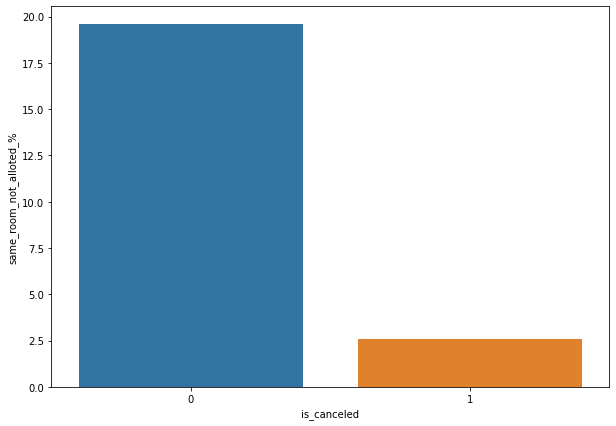

In [ ]:
def check_room_allot(x):
   if x['reserved_room_type'] !=x['assigned_room_type']:
      return 1
   else:
      return 0
hotel_df['same_room_not_alloted'] =hotel_df.apply(lambda x: check_room_allot(x),axis = 1)
grp_by_canc =hotel_df.groupby('is_canceled')

D3 =pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y =D3['same_room_not_alloted_%'])
plt.show()

We can  see that not getting the same as demanded is not a case of cancellation of rooms . A significant percentage of bookings are not cancelled even after diffrent rooms as demanded .

Lets see if not getting the same room effects the adr or not .

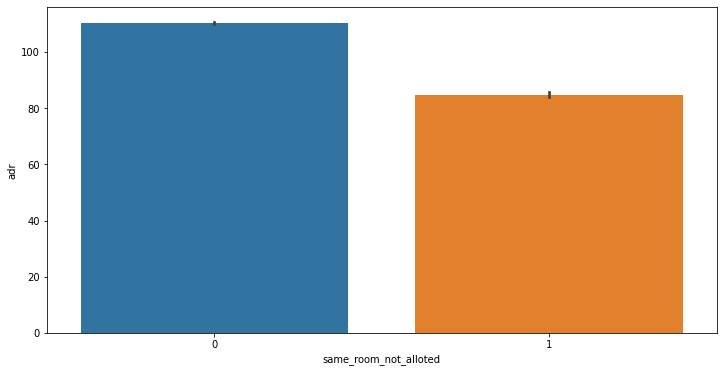

In [ ]:
plt.figure(figsize =(12,6))
sns.barplot(x ='same_room_not_alloted',y ='adr',data = hotel_df)
plt.show()

We can observe that not getting the same room do effects the adr. People who didn't get the same room have paid a little lower adr ,except few exceptions .

#4) Time wise analysis 

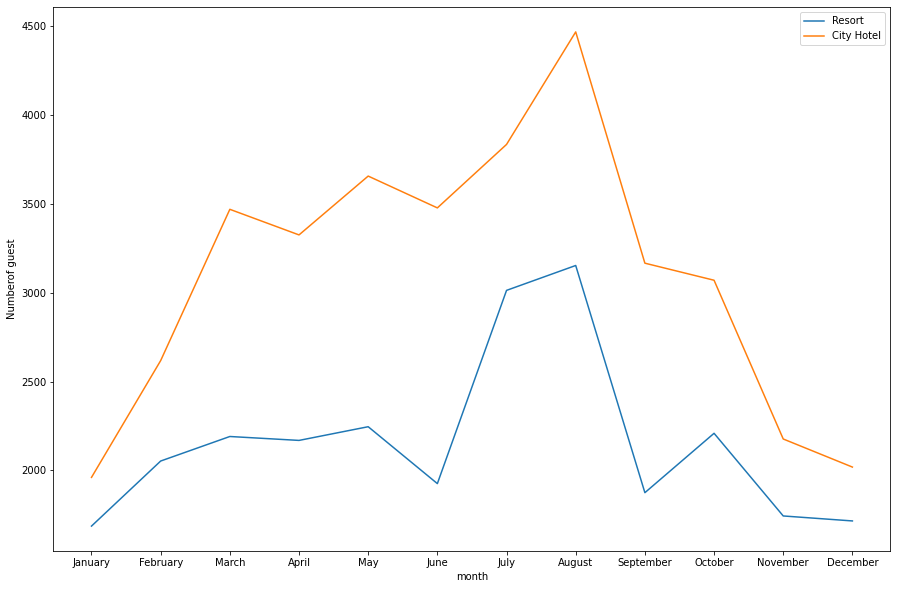

In [ ]:
#which are the most busy  months ?
d_month = hotel_df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests'] 
d_month
months =['January','February','March','April','May','June','July','August','September','October','November','December']
d_month['months']= pd.Categorical(d_month['months'],categories = months , ordered =True)
d_month.sort_values('months').reset_index()

data_resort = hotel_df[(hotel_df['hotel'] =='Resort Hotel') & (hotel_df['is_canceled'] == 0)]
data_city = hotel_df[(hotel_df['hotel'] =='City Hotel')& (hotel_df['is_canceled']== 0 )]
resort_hotel =data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel ,on = 'arrival_date_month')
final_hotel.columns =['month','price_for_resort','price_for_city_hotel']
final_hotel 
 
resort_guest =data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest =data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest,on= 'month')
final_guest.columns=['month','no of guest in resort ','no of guest in city hotel']
final_guest
months=['January','February','March','April','May','June','July','August','September','October','November','December']
final_guest['month']=pd.Categorical(final_guest['month'],categories=months,ordered =True)
final_guest = final_guest.sort_values('month').reset_index()

#Which monthget the most numbers vistors?
sns.lineplot(data=final_guest, x='month',y='no of guest in resort ')
sns.lineplot(data=final_guest, x='month',y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Numberof guest')
fig =plt.gcf()
fig.set_size_inches(15,10)



By this we can observe that more number of customers visit in thew month of August

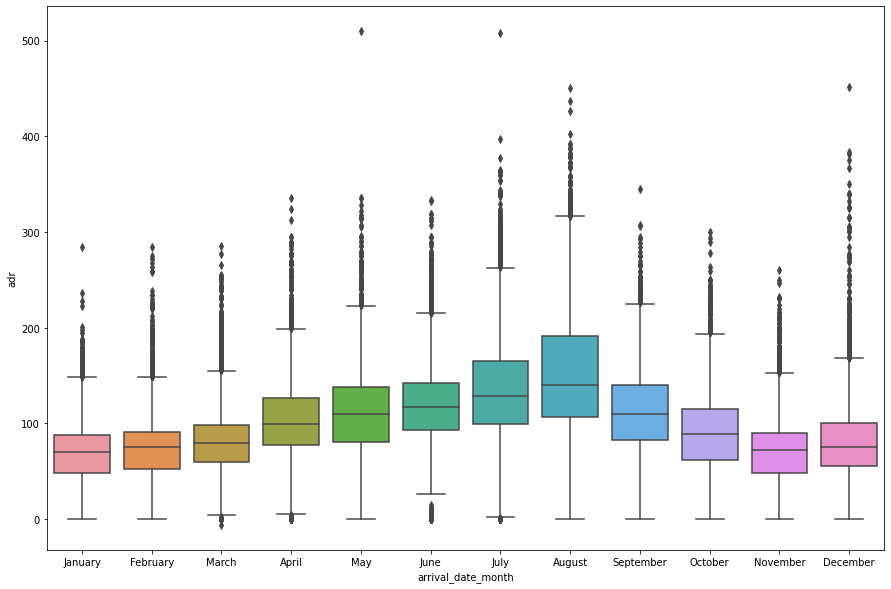

In [ ]:
reindex= ['January','February','March','April','May','June','July','August','September','October','November','December']
hotel_df['arrival_date_month']=pd.Categorical(hotel_df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize=(15,10))
sns.boxplot(x=hotel_df['arrival_date_month'],y=hotel_df['adr'])
plt.show()

The average annaual rises from the begining fo the year up to the middle of the year , reaches its peak in August,and then lowers to the end of the year .But hotels do make some good deals with high ADR at the end of the year also

# Conclusion

1) when compared to the Resort hotel ,City hotel recieves the most number of bookings 

2) mostly peoplle choose the TA/TO  channel for booking hotel and for cancellation as well

3) By the help of most demand room type and better adr rooms the hotels can increase the number of particular room types and maximize their revenue .

4) Resort hotel have more chances of customer repeating the same hotel on their next visit

5) Reosrt hotels have more revenue generating deals by direct and TA/TO channel. It needs to incresse its out reach on the GDS channel to increase revenue .

5) Most guest arrive during the month of August in both type of hotels .